In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import pandas as pd
from pickle import load

In [6]:
# load food tree data
x_train = pd.read_csv("../../../data/04/processed_for_ml/binary_class/x_train_taxahfe_no_sf.csv", index_col=0, header=0)
y_train = pd.read_csv("../../../data/04/processed_for_ml/binary_class/y_train_taxahfe.csv", index_col = 0, header = 0 )
sw_train = pd.read_csv("../../../data/04/processed_for_ml/binary_class/sw_train_taxahfe.csv", index_col = 0, header = 0 )
x_test = pd.read_csv("../../../data/04/processed_for_ml/binary_class/x_test_no_sf.csv", index_col=0, header=0)
y_test = pd.read_csv("../../../data/04/processed_for_ml/binary_class/y_test_class.csv", index_col = 0, header = 0 )
x_test = x_test[x_train.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train = x_train.sort_index(axis = 0)
y_train = y_train.sort_index(axis = 0)
x_test = x_test.sort_index(axis = 0)
y_test = y_test.sort_index(axis = 0)

# load diet only data
x_train_diet = pd.read_csv("../../../data/04/processed_for_ml/binary_class/x_train_taxahfe_no_sf_diet.csv", index_col=0, header=0)
x_test_diet = pd.read_csv("../../../data/04/processed_for_ml/binary_class/x_test_no_sf_diet.csv", index_col=0, header=0)
x_test_diet = x_test_diet[x_train_diet.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train_diet = x_train_diet.sort_index(axis = 0)
x_test_diet = x_test_diet.sort_index(axis = 0)


## plot ROC-AUC for XGB

In [7]:
#load xgb models from food tree data
xgb_tree = load(open("../food_tree/model/xgboost/xgboost_binary_class.pkl", "rb"))
xgb_diet_tree = load(open("../food_tree/model/xgboost/xgboost_binary_class_diet.pkl", "rb"))

In [8]:
y_score_xgb = xgb_tree.predict_proba(x_test)
y_score_xgb_diet = xgb_diet_tree.predict_proba(x_test_diet)

In [9]:
# load dii data
x_train_dii = pd.read_csv("../../../data/05/dii/x_train.csv", index_col=0, header=0)
y_train_dii = pd.read_csv("../../../data/05/dii/y_train.csv", index_col = 0, header = 0 )
sw_train_dii = pd.read_csv("../../../data/05/dii/sw_train.csv", index_col = 0, header = 0 )
x_test_dii = pd.read_csv("../../../data/05/dii/x_test.csv", index_col=0, header=0)
y_test_dii = pd.read_csv("../../../data/05/dii/y_test.csv", index_col = 0, header = 0 )
x_test_dii = x_test_dii[x_train_dii.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train_dii = x_train_dii.sort_index(axis = 0)
y_train_dii = y_train_dii.sort_index(axis = 0)
x_test_dii = x_test_dii.sort_index(axis = 0)
y_test_dii = y_test_dii.sort_index(axis = 0)

In [10]:
# load dii diet only data
x_train_dii_diet = pd.read_csv("../../../data/05/dii/x_train_diet.csv", index_col=0, header=0)
x_test_dii_diet = pd.read_csv("../../../data/05/dii/x_test_diet.csv", index_col=0, header=0)
x_test_dii_diet = x_test_dii[x_train_dii_diet.columns] # reordered columns to match (column ordered changed during taxahfe)

x_train_dii_diet = x_train_dii_diet.sort_index(axis = 0)
x_test_dii_diet = x_test_dii_diet.sort_index(axis = 0)

In [11]:
xgb_dii = load(open("../dii/model/xgboost/xgboost_binary_class_dii_edu.pkl", "rb")) 
xgb_diet_dii = load(open("../dii/model/xgboost/xgboost_binary_class_dii_diet_edu.pkl", "rb")) 

In [12]:
y_score_dii = xgb_dii.predict_proba(x_test_dii)
y_score_dii_diet = xgb_diet_dii.predict_proba(x_test_dii_diet)

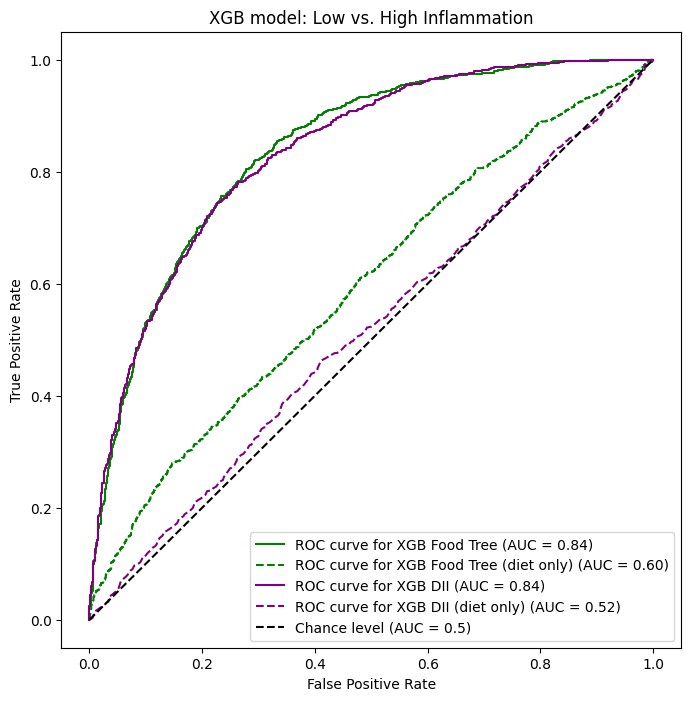

In [14]:
# combine all curves into one plot

fig, ax = plt.subplots(figsize=(8, 8))

RocCurveDisplay.from_predictions(
        y_test['crp_class'],
        y_score_xgb[:,0],
        pos_label = 0,
        name=f"ROC curve for XGB Food Tree",
        color="green",
        ax=ax,
    )

RocCurveDisplay.from_predictions(
        y_test['crp_class'],
        y_score_xgb_diet[:,0],
        pos_label = 0,
        name=f"ROC curve for XGB Food Tree (diet only)",
        color="green",
        linestyle='dashed',
        ax=ax,
        #plot_chance_level=(0.5),
    )

RocCurveDisplay.from_predictions(
        y_test_dii['crp_class'],
        y_score_dii[:,0],
        pos_label = 0,
        name=f"ROC curve for XGB DII",
        color="purple",
        ax=ax,
        #plot_chance_level=(class_id == 0),
    )

RocCurveDisplay.from_predictions(
        y_test_dii['crp_class'],
        y_score_dii_diet[:,0],
        pos_label = 0,
        name=f"ROC curve for XGB DII (diet only)",
        color="purple",
        linestyle='dashed',
        ax=ax,
        plot_chance_level=(0.5),
    )

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="XGB model: Low vs. High Inflammation",
)

plt.savefig('plot/roc_auc/xgb_dii_vs_food_tree.png', bbox_inches='tight',dpi=1000)

In [15]:
rf_dii = load(open("../dii/model/rf_binary_class_dii_edu.pkl", "rb"))
rf_dii_diet = load(open("../dii/model/rf_binary_class_dii_diet_edu.pkl", "rb"))

rf_tree = load(open("../food_tree/model/rf/rf_regressor_crp_binary_class.pkl", "rb")) 
rf_tree_diet = load(open("../food_tree/model/rf/rf_regressor_crp_binary_class_diet.pkl", "rb")) 

In [16]:
y_score_rf_dii = rf_dii.predict_proba(x_test_dii)
y_score_rf_dii_diet = rf_dii_diet.predict_proba(x_test_dii_diet)

In [17]:
y_score_rf_tree = rf_tree.predict_proba(x_test)
y_score_rf_tree_diet = rf_tree_diet.predict_proba(x_test_diet)

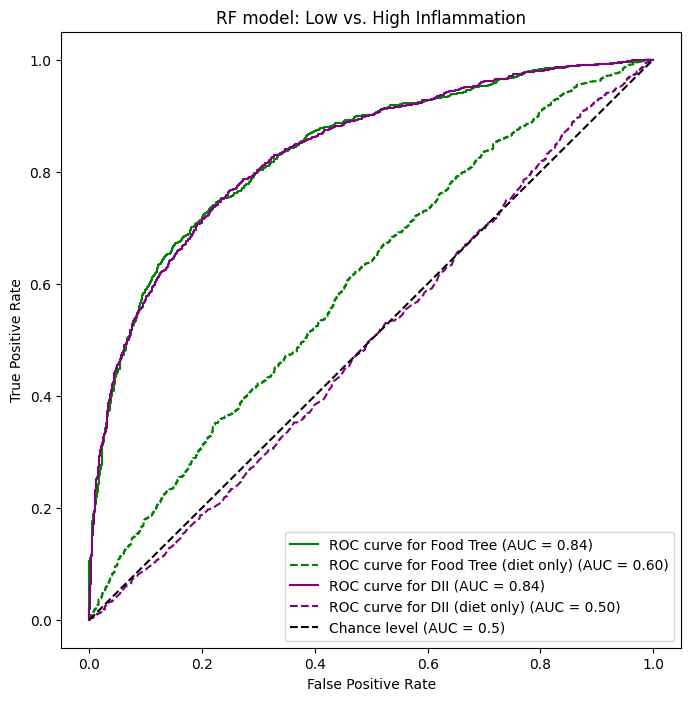

In [18]:
# combine all curves into one plot

fig, ax = plt.subplots(figsize=(8, 8))

RocCurveDisplay.from_predictions(
        y_test['crp_class'],
        y_score_rf_tree[:, 1],
        pos_label = 1,
        name=f"ROC curve for Food Tree",
        color="green",
        ax=ax,
        #plot_chance_level=(class_id == 0),
    )

RocCurveDisplay.from_predictions(
        y_test['crp_class'],
        y_score_rf_tree_diet[:, 1],
        pos_label = 1,
        name=f"ROC curve for Food Tree (diet only)",
        color="green",
        linestyle='dashed',
        ax=ax,
        #plot_chance_level=(class_id == 0),
    )

RocCurveDisplay.from_predictions(
        y_test_dii['crp_class'],
        y_score_rf_dii[:, 1],
        pos_label = 1,
        name=f"ROC curve for DII",
        color="purple",
        ax=ax,
        #plot_chance_level=(class_id == 0),
    )

RocCurveDisplay.from_predictions(
        y_test_dii['crp_class'],
        y_score_rf_dii_diet[:, 1],
        pos_label = 1,
        name=f"ROC curve for DII (diet only)",
        linestyle='dashed',
        color="purple",
        ax=ax,
        plot_chance_level=(0.5),
    )

ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="RF model: Low vs. High Inflammation",
)

plt.savefig('rf_dii_vs_food_tree.png', bbox_inches='tight',dpi=1000)